In [1]:
import os
loc = 'lung_image_sets'

In [2]:
print(os.listdir(loc))

['lung_aca', 'lung_n', 'lung_scc']


In [3]:
import cv2
from tqdm import tqdm
features = []

for dir in os.listdir(loc):
    sub_dir = os.path.join(loc,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        f = cv2.imread(os.path.join(sub_dir , img))
        f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f , (100,100))
        features.append(f)

lung_image_sets\lung_aca
*************


100%|██████████| 5000/5000 [01:55<00:00, 43.29it/s]


lung_image_sets\lung_n
*************


100%|██████████| 5000/5000 [01:51<00:00, 44.80it/s]


lung_image_sets\lung_scc
*************


100%|██████████| 5000/5000 [01:55<00:00, 43.19it/s]


In [4]:
import numpy as np
X = np.array(features)
print(X.shape)

(15000, 100, 100)


In [5]:
labels = []
i = 0

for dir in os.listdir(loc):
    sub_dir = os.path.join(loc,dir)
    print(sub_dir)
    print('*************')
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1

lung_image_sets\lung_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 909669.47it/s]


lung_image_sets\lung_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 1553561.00it/s]


lung_image_sets\lung_scc
*************


100%|██████████| 5000/5000 [00:00<00:00, 717883.13it/s]


In [6]:
Y = np.array(labels)
print(Y.shape)

(15000,)


In [7]:
Y[-1]

2

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [9]:
print(xtrain.shape)
print(xtest.shape)

(11250, 100, 100)
(3750, 100, 100)


In [10]:
xtrainS = xtrain.reshape(11250,-1)
xtestS = xtest.reshape(3750,-1)
xtrainS.shape

(11250, 10000)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

scl.fit(xtrainS)

xtrainS = scl.transform(xtrainS)
xtestS = scl.transform(xtestS)

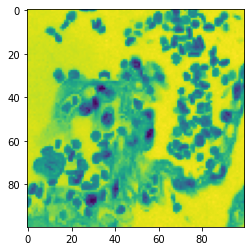

In [12]:
import matplotlib.pyplot as plt
plt.imshow(xtrainS[5000].reshape(100,100))
plt.show()

In [13]:
import tensorflow as tf

ytrainS = tf.keras.utils.to_categorical(ytrain)
ytestS = tf.keras.utils.to_categorical(ytest)

In [17]:
from keras import models,layers,optimizers,regularizers

model = models.Sequential()

model.add(layers.Dense(2056 ,  kernel_regularizer = regularizers.l2(0.001) , activation = 'relu' , input_dim = 10000))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1024 , kernel_regularizer = regularizers.l2(0.001) , activation = 'relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1024 , kernel_regularizer = regularizers.l2(0.001) , activation = 'relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(512 , kernel_regularizer = regularizers.l2(0.001) , activation = 'relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(256 , kernel_regularizer = regularizers.l2(0.001) , activation = 'relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3 , kernel_regularizer = regularizers.l2(0.001) , activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2056)              20562056  
_________________________________________________________________
dropout_5 (Dropout)          (None, 2056)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2106368   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

In [18]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(0.01)
model.compile(loss='binary_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') >= 0.81:
                print('\nReached 81.0% accuracy so cancelling training!')
                self.model.stop_training=True
                
callbacks = myCallback()

In [25]:
# setting up early stopping to stop training when max acc is reached
# we are using validation loss as parameter for monitoring the training process
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3)

logger = CSVLogger('logs.csv', append=True)

In [26]:
model.fit(xtrainS,ytrainS,
         epochs=100,
         validation_data=(xtestS,ytestS),
         callbacks=[callbacks, logger])

Epoch 1/100
352/352 [==============================] - 4s 12ms/step - loss: 1.1746 - accuracy: 0.8516 - val_loss: 1.2713 - val_accuracy: 0.7869
Epoch 2/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1647 - accuracy: 0.8482 - val_loss: 1.4182 - val_accuracy: 0.6693
Epoch 3/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1498 - accuracy: 0.8532 - val_loss: 1.2510 - val_accuracy: 0.7981
Epoch 4/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1512 - accuracy: 0.8450 - val_loss: 1.2735 - val_accuracy: 0.7368
Epoch 5/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1307 - accuracy: 0.8497 - val_loss: 1.2732 - val_accuracy: 0.7443
Epoch 6/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1026 - accuracy: 0.8649 - val_loss: 1.4310 - val_accuracy: 0.6592
Epoch 7/100
352/352 [==============================] - 4s 11ms/step - loss: 1.1119 - accuracy: 0.8481 - val_loss: 1.2507 - val_accuracy: